In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('zoo.csv')


In [16]:
df_updates = df.drop('animal name',axis=1)
array = df_updates.values
X = array[:, 0:16]
Y = array[:, 16]

In [12]:
df_updates

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [18]:
# using Kfold cross validation
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model,X,Y,cv=kfold)

In [19]:
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [20]:
print(results.mean())

0.78


In [21]:
#Grid Serach for Algorith tuning 
from sklearn.model_selection import GridSearchCV

In [22]:
df_updates = df.drop('animal name',axis=1)
array = df_updates.values
X = array[:, 0:16]
Y = array[:, 16]

In [23]:
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid


{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39])}

In [24]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.93
{'n_neighbors': 3}


In [26]:
# visualising CV
k_range = range(1,40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
pd.Series(k_scores).sort_values(ascending=False)                            

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
21    0.781818
20    0.781818
18    0.781818
17    0.781818
16    0.781818
19    0.781818
14    0.781818
12    0.781818
11    0.781818
10    0.781818
9     0.781818
8     0.781818
13    0.781818
22    0.771818
23    0.741818
24    0.721818
28    0.702727
30    0.702727
29    0.702727
27    0.702727
26    0.702727
25    0.702727
31    0.692727
32    0.643636
33    0.593636
34    0.593636
35    0.573636
36    0.573636
37    0.573636
38    0.573636
dtype: float64

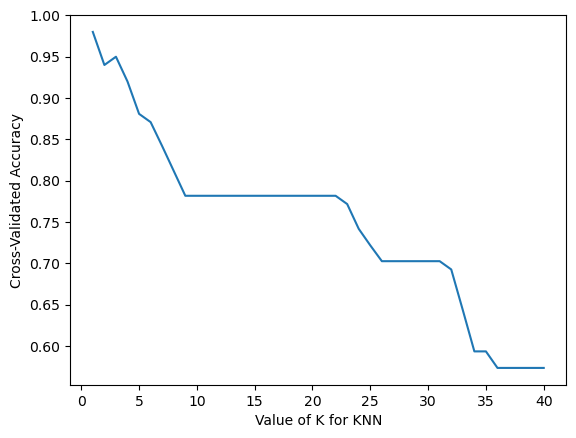

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1,41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)    

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
    

In [ ]:
# Insights from Graph
# K is maximum at 1 % Accuracy 